In [97]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, classification_report, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE


# **Data loading and Preprocessing**

In [98]:
# File ID from Google Drive share link
file_id = "1YF73QNFjNYNnqqN2vHymT3NQG3qwd4RD"
file_url = f"https://drive.google.com/uc?id={file_id}"

df = pd.read_csv(file_url)
print("Data loaded successfully!")
display(df)


Data loaded successfully!


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False


In [99]:
df["Churn"] = df["Churn"].astype(int)
df['Churn']

,Churn
0,0
1,0
2,0
3,0
4,0
...,...
2661,0
2662,0
2663,0
2664,0


##**Feature** **Selection**

In [100]:
df = df.drop(columns=["State", "Area code", "Account length","Total day calls","Total eve calls","Total night calls","Total intl calls"])
df["International plan"] = df["International plan"].map({"Yes": 1, "No": 0})
df["Voice mail plan"] = df["Voice mail plan"].map({"Yes": 1, "No": 0})

In [101]:
df

,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge,Customer service calls,Churn
0,0,1,25,265.1,45.07,197.4,16.78,244.7,11.01,10.0,2.70,1,0
1,0,1,26,161.6,27.47,195.5,16.62,254.4,11.45,13.7,3.70,1,0
2,0,0,0,243.4,41.38,121.2,10.30,162.6,7.32,12.2,3.29,0,0
3,1,0,0,299.4,50.90,61.9,5.26,196.9,8.86,6.6,1.78,2,0
4,1,0,0,166.7,28.34,148.3,12.61,186.9,8.41,10.1,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,0,0,0,134.7,22.90,189.7,16.12,221.4,9.96,11.8,3.19,2,0
2662,0,1,36,156.2,26.55,215.5,18.32,279.1,12.56,9.9,2.67,2,0
2663,0,0,0,231.1,39.29,153.4,13.04,191.3,8.61,9.6,2.59,3,0
2664,0,0,0,180.8,30.74,288.8,24.55,191.9,8.64,14.1,3.81,2,0


## **Data splitting**

In [102]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [104]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
print(y.value_counts())


Churn
0    2278
1     388
Name: count, dtype: int64


## **Synthetic Minority Oversampling (SMOTE)**

In [105]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", np.bincount(y_train))
print("After SMOTE :", np.bincount(y_train_res))

Before SMOTE: [1822  310]
After SMOTE : [1822 1822]


# **Train Model**

In [110]:
model_smote = LogisticRegression(max_iter=500, random_state=42)
model_smote.fit(X_train_res, y_train_res)
coefficients = model_smote.coef_[0]
features = X.columns

print("\nModel Coefficients:")
for feat, coef in zip(features, coefficients):
    odds_ratio = np.exp(coef)
    print(f"{feat}: Coef={coef:.4f}, Odds Ratio={odds_ratio:.4f}")


Model Coefficients:
International plan: Coef=0.8229, Odds Ratio=2.2772
Voice mail plan: Coef=-0.7030, Odds Ratio=0.4951
Number vmail messages: Coef=0.1739, Odds Ratio=1.1900
Total day minutes: Coef=0.4126, Odds Ratio=1.5108
Total day charge: Coef=0.4110, Odds Ratio=1.5083
Total eve minutes: Coef=0.1617, Odds Ratio=1.1755
Total eve charge: Coef=0.1608, Odds Ratio=1.1745
Total night minutes: Coef=0.1253, Odds Ratio=1.1335
Total night charge: Coef=0.1259, Odds Ratio=1.1342
Total intl minutes: Coef=0.1457, Odds Ratio=1.1568
Total intl charge: Coef=0.1540, Odds Ratio=1.1665
Customer service calls: Coef=0.9498, Odds Ratio=2.5852


# **Evaluation and visualization**


Evaluation Metrics:
Accuracy: 0.7546816479400749
Precision: 0.32903225806451614
Recall: 0.6538461538461539

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       456
           1       0.33      0.65      0.44        78

    accuracy                           0.75       534
   macro avg       0.63      0.71      0.64       534
weighted avg       0.84      0.75      0.78       534


Confusion Matrix:
 [[352 104]
 [ 27  51]]


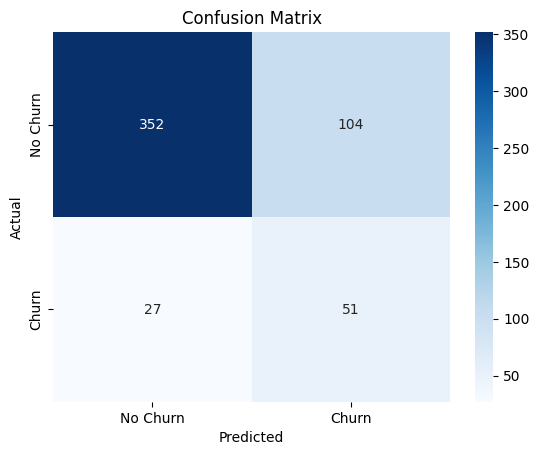

In [111]:
y_pred = model_smote.predict(X_test_scaled)

print("\nEvaluation Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No Churn", "Churn"], yticklabels=["No Churn", "Churn"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

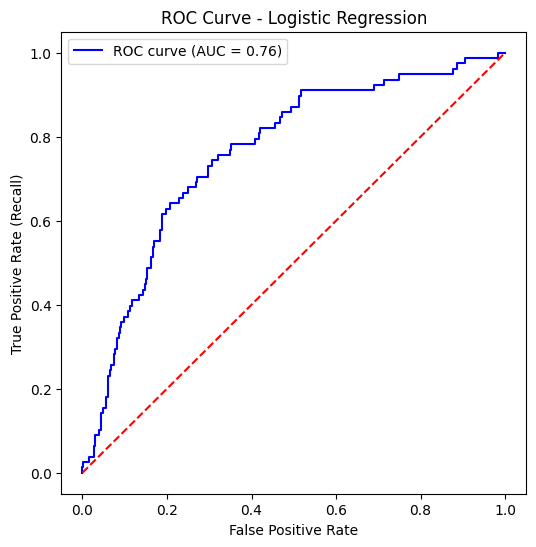

In [112]:
y_pred_prob = model_smote.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='red', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()